In [93]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal
from scipy import interpolate
import time
import build_data_df_mine as bd

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


pe_vector = np.array([2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000])
length_vector = np.array([125.2,
                          151.58,
                          169.01,
                          182.12,
                          192.58,
                          201.33,
                          208.83,
                          215.37,
                          220.84,
                          258.37,
                          279.91,
                          295.04,
                          306.74,
                          316.23,
                          324.23,
                          331.11,
                          337.22,
                          342.95,
                          378.55,
                          399.26,
                          413.88,
                          425.24,
                          434.5,
                          442,
                          449.05,
                          455,
                          460.37]) 

In [94]:
data_cal = []

HV = 52
pe_peak = 25.5E-6

for i in ['025','05','075','1','105','2','205','3']:
    data_aux = pd.read_csv('/home/vherrero/ToT_work/petalo_'+ i +'pe_'+str(HV)+'V.csv')
    data_aux = data_aux.rename(columns={data_aux.columns[0]:"pe",
                         data_aux.columns[1]:"length"})
    data_aux['pe']     = data_aux['pe']/(pe_peak)
    data_aux['length'] = data_aux['length']/(1E-9)
    data_cal.append(data_aux)

<IPython.core.display.Javascript object>


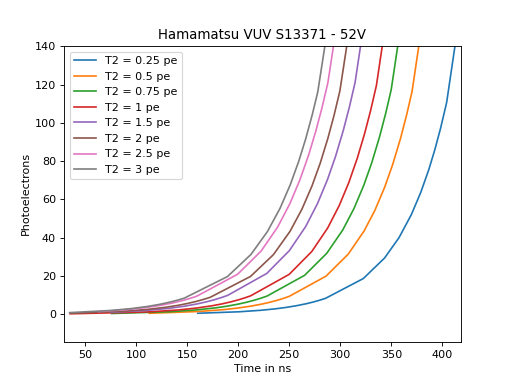

Threshold = 1 [1.65493738e-02 4.58824027e+01]
Threshold = 2 [ 0.04994206 47.74748749]
Threshold = 3 [ 0.08554291 48.42529909]
Threshold = 4 [ 0.12648874 48.94396331]
Threshold = 5 [ 0.21960983 49.81148426]
Threshold = 6 [ 0.26814503 49.30317955]
Threshold = 7 [ 0.3997108 50.3789056]
Threshold = 8 [ 0.44089556 49.8547898 ]


Text(0, 0.5, 'Photoelectrons')

In [95]:
plt.figure()
exp_param=[]

pe=['0.25','0.5','0.75','1','1.5','2','2.5','3']
for i in range(8):
    #plt.plot(data[i]['length'],data[i]['pe'])

    fit_LOG = TPcal.fitting_nohist_pe()
    fit_LOG(data_cal[i]['pe'],data_cal[i]['length'],TPcal.exp_tot,[0,20])
    plt.plot(data_cal[i]['length'],fit_LOG.fit,label=("T2 = %s pe" % pe[i]))
    plt.legend(loc="upper left")
    plt.title('Hamamatsu VUV S13371 - ' + str(HV)+'V')
    print("Threshold = %i" % (i+1),fit_LOG.coeff)
    exp_param.append(fit_LOG.coeff)
    
    
plt.xlabel("Time in ns")
plt.ylabel("Photoelectrons")

# SANITY CHECK

In [5]:
def compute_integration_window_size(df):
    df['intg_w'] = (df.ecoarse - (df.tcoarse % 2**10)).astype('int16')
    df.loc[df['intg_w'] < 0, 'intg_w'] += 2**10

In [14]:
run = 11282

asic = 0
path_data = "/analysis/" + str(run) + "/hdf5/proc/linear_interp/files/"
#path_data = "/analysis/" + str(run) + "/hdf5/data/"

data_aux=[]
file_number = 0

file_data = path_data + 'run_' + str(run) +\
            '_'+ str(file_number).zfill(4) + '_trigger1_waveforms.h5'
    
with pd.HDFStore(file_data,'r',complib="zlib",complevel=4) as storage:
    print(storage.keys())
    for j in storage.keys():
        data_aux.append(pd.read_hdf(file_data,j))
    #data_aux.append(pd.read_hdf(file_data,'/data',stop=2000000))

data=pd.concat(data_aux).reset_index()


['/data_0', '/data_1', '/data_2', '/data_3']


<IPython.core.display.Javascript object>


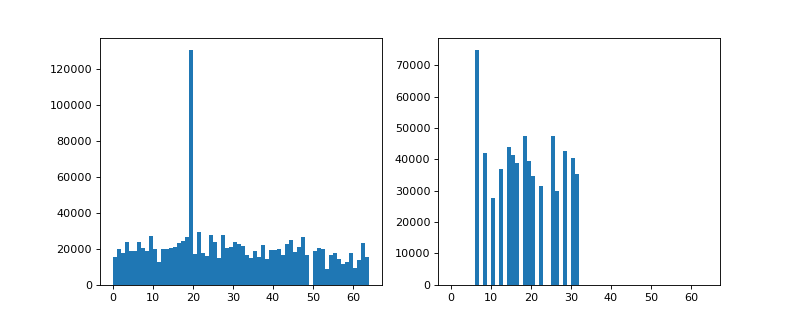

(array([    0.,     0.,     0.,     0.,     0.,     0., 74898.,     0.,
        42056.,     0., 27801.,     0., 37050.,     0., 43856., 41444.,
        39014.,     0., 47378., 39652., 34881.,     0., 31485.,     0.,
            0., 47369., 29977.,     0., 42817.,     0., 40361., 35432.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 <BarContainer object of 64 artists>)

In [15]:
fig, axis = plt.subplots(1,2,figsize=(10,4))
#data[(data['tofpet_id']==0)&(data['intg_w']<80)&(data['intg_w']>20)]['sensor_id'].hist(bins=64,range=[0,64])
axis[0].hist(data[(data['tofpet_id']==0)]['channel_id'],bins=64,range=[0,64],log=False)
axis[1].hist(data[(data['tofpet_id']==2)]['channel_id'],bins=64,range=[0,64],log=False)

<IPython.core.display.Javascript object>


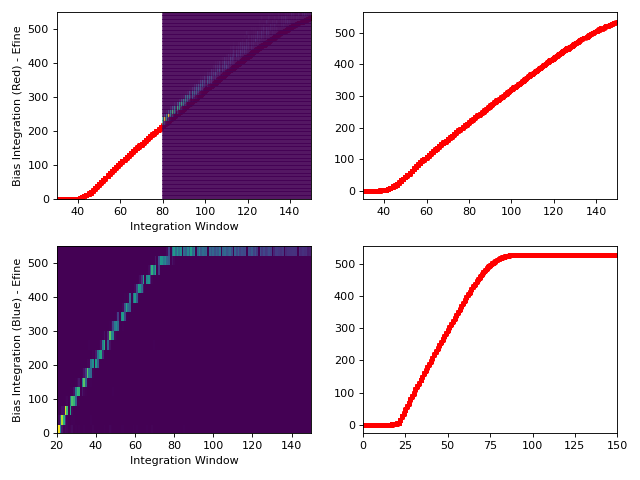

In [52]:
data_f = data[(data['sensor_id']==45) & (data['tofpet_id']==0)]
data_f2 = data[(data['channel_id']==6) & (data['tofpet_id']==2)]
#data_f3 = data3[(data3['channel_id']==31) & (data3['tofpet_id']==0)]

ibias_f  = data_f['efine']-data_f['efine_corrected']
ibias_f2 = data_f2['efine']-data_f2['efine_corrected']

fig, axis2 = plt.subplots(2,2,figsize=(8,6))
axis2[0,0].scatter(data_f['intg_w'],ibias_f, color='r', alpha=1, marker='.')
axis2[0,1].scatter(data_f['intg_w'],ibias_f, color='r', alpha=1, marker='.')
axis2[0,1].set_xlim([30,150])
axis2[0,0].hist2d(data_f['intg_w'],data_f['efine'],bins=[150,50],density=True,range=[[80,150],[0,550]],alpha=0.7)
axis2[0,0].set_xlim([30,150])
axis2[0,0].set_xlabel('Integration Window')
axis2[0,0].set_ylabel('Bias Integration (Red) - Efine')

axis2[1,1].scatter(data_f2['intg_w'],ibias_f2, color='r', alpha=1, marker='.')
axis2[1,1].set_xlim([0,150])
axis2[1,0].hist2d(data_f2['intg_w'],data_f2['efine'],bins=[150,20],density=False,range=[[20,150],[0,550]])
axis2[1,0].set_xlabel('Integration Window')
axis2[1,0].set_ylabel('Bias Integration (Blue) - Efine')
plt.tight_layout()


<IPython.core.display.Javascript object>


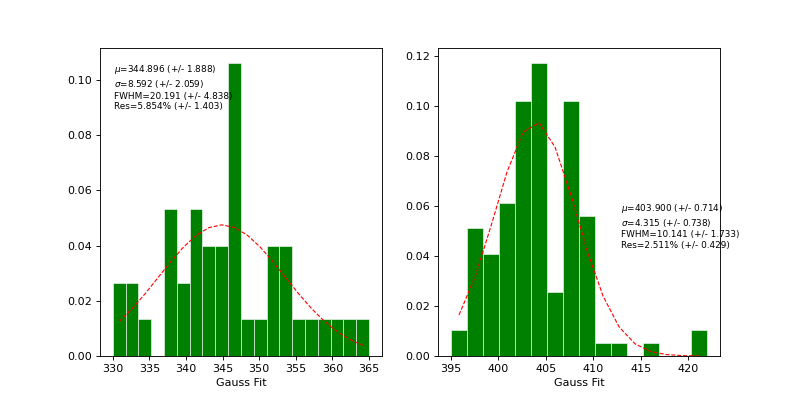

In [50]:
data_f_p = data_f[(data_f['intg_w']<101) & (data_f['intg_w']>99)]
data_f_p2 = data_f2[(data_f2['intg_w']<61) & (data_f2['intg_w']>59)]
#plt.figure()
#ToT = TPcal.exp_tot(data_f['intg_w']*5,0.56942179,51.73363241)
#ToT = data_f['intg_w']
#ToT = ToT[(ToT>-1) & (ToT<1000)]
#plt.hist(ToT,bins=200)
#plt.hist(data_f['efine_corrected'],bins=1000,color='red',alpha=0.5)
#plt.xlim([-1000,1000])

fig = plt.figure(figsize=[10,5])
axis  = fig.add_subplot(121)
axis2 = fig.add_subplot(122)
coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_f_p['efine'],20,True,axis,'Gauss Fit','','',[0.05,0.95,"left"])
coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_f_p2['efine'],16,True,axis2,'Gauss Fit','','',[0.65,0.5,"left"])

<IPython.core.display.Javascript object>


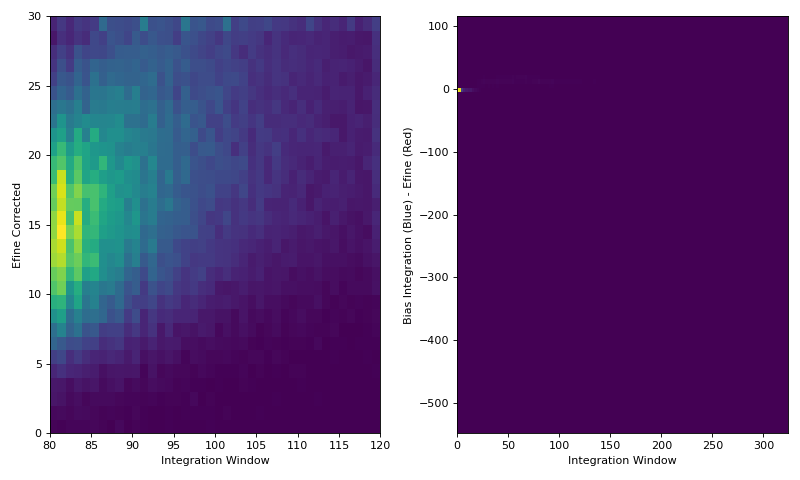

In [51]:
data_f3 = data[data['tofpet_id']==0]
data_f4 = data[data['tofpet_id']==2]

fig, axis3 = plt.subplots(1,2,figsize=(10,6))
axis3[0].hist2d(data_f3['intg_w'],data_f3['efine_corrected'],bins=[40,30],density=True,range=[[80,120],[0,30]])
axis3[0].set_xlabel('Integration Window')
axis3[0].set_ylabel('Efine Corrected')

axis3[1].hist2d(data_f4['intg_w'],data_f4['efine_corrected'],bins=[150,100],density=True)#,range=[[20,150],[0,550]])
axis3[1].set_xlabel('Integration Window')
axis3[1].set_ylabel('Bias Integration (Blue) - Efine (Red)')
plt.tight_layout()

<IPython.core.display.Javascript object>


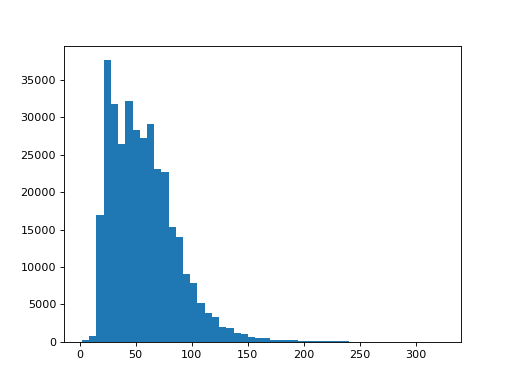

(array([2.9900e+02, 7.7700e+02, 1.6964e+04, 3.7670e+04, 3.1851e+04,
        2.6439e+04, 3.2234e+04, 2.8269e+04, 2.7312e+04, 2.9080e+04,
        2.3164e+04, 2.2746e+04, 1.5293e+04, 1.4059e+04, 9.0820e+03,
        7.8180e+03, 5.1540e+03, 3.7820e+03, 3.3140e+03, 2.0110e+03,
        1.7860e+03, 1.1460e+03, 1.0430e+03, 6.5400e+02, 4.9500e+02,
        4.6800e+02, 2.6800e+02, 2.5200e+02, 1.7400e+02, 1.8400e+02,
        9.6000e+01, 1.1200e+02, 5.7000e+01, 8.4000e+01, 5.2000e+01,
        4.0000e+01, 5.1000e+01, 2.5000e+01, 2.5000e+01, 2.3000e+01,
        1.8000e+01, 8.0000e+00, 8.0000e+00, 1.0000e+01, 5.0000e+00,
        4.0000e+00, 0.0000e+00, 5.0000e+00, 4.0000e+00, 1.4000e+01]),
 array([  2.  ,   8.44,  14.88,  21.32,  27.76,  34.2 ,  40.64,  47.08,
         53.52,  59.96,  66.4 ,  72.84,  79.28,  85.72,  92.16,  98.6 ,
        105.04, 111.48, 117.92, 124.36, 130.8 , 137.24, 143.68, 150.12,
        156.56, 163.  , 169.44, 175.88, 182.32, 188.76, 195.2 , 201.64,
        208.08, 214.52, 220.96

In [55]:
plt.figure()
#plt.hist(data[(data['intg_w']>54)&(data['intg_w']<56)]['efine_corrected'],bins=50)
plt.hist(data_f['intg_w'],bins=50)

energy_array_e = []
energy_array_t = []
sipm_array   = []

clustered_data_chunk = clustered_data.loc[0:500000]

for i in clustered_data_chunk['cluster'].unique():
    if i != -1:
        evt_aux = clustered_data_chunk[clustered_data_chunk['cluster']==i]
        for j in evt_aux['evt_number'].unique():      
            evt = evt_aux[evt_aux['evt_number'] == j]
            #Rough coincidence filter
            #if evt['tofpet_id'].unique().size == 2:
            hamamatsu = evt[evt['tofpet_id']==0]
            H_ToToro = TPcal.exp_tot(hamamatsu['intg_w']*5,0.46342323,51.25029266)
            H_efine = hamamatsu['efine_corrected']
            energy_hamamatsu_tot  = np.sum(H_ToToro)
            energy_hamamatsu_efine = np.sum(H_efine)
            energy_array_t.append(energy_hamamatsu_tot)
            energy_array_e.append(energy_hamamatsu_efine)

energy_array_t = np.array(energy_array_t)
energy_array_e = np.array(energy_array_e)


fig = plt.figure(figsize=[10,5])

energy_array_T = energy_array_t[(energy_array_t>50) & (energy_array_t<10000)]
energy_array_E = energy_array_e[(energy_array_e>50) & (energy_array_e<10000)]


axis = fig.add_subplot(121)
#coeff,coeff_err,chisq_r=TPcal.gauss_fit(energy_array_T,150,True,axis,'ToT','','',[0.65,0.5,"left"])
axis.hist(energy_array_T,bins=100,density=True)

axis2 = fig.add_subplot(122)
#coeff,coeff_err,chisq_r=TPcal.gauss_fit(energy_array_E,150,True,axis2,'Efine','','',[0.65,0.5,"left"])
axis2.hist(energy_array_E,bins=100,density=True)

In [691]:
evt=data[(data['cluster']==9) & (data['evt_number']==2) & (data['tofpet_id']==0)].reset_index()

<IPython.core.display.Javascript object>


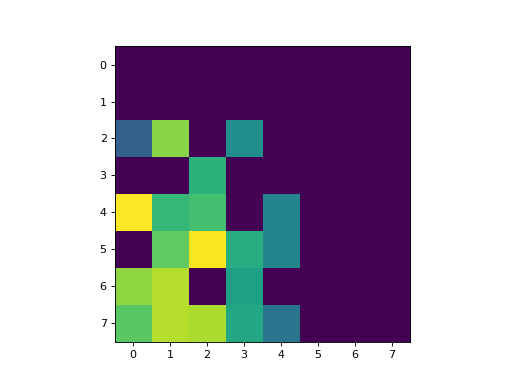

In [692]:
image=np.zeros((8,8))
for i in range(len(evt)):
    sipm = evt.iloc[i]['sensor_id']
    y = int(sipm // 10)-1
    x = int(sipm % 10)-1
    image[x,y] = evt.iloc[i]['intg_w']
plt.figure()
plt.imshow(image)

In [658]:
data[(data['cluster']==33)]

,index,evt_number,ctdaq,ct_data,tofpet_id,channel_id,sensor_id,tac_id,tcoarse,ecoarse,tfine,efine,intg_w,tcoarse_extended,tfine_corrected,t,efine_corrected,cluster
524,524,1,3364211,20,0,17,28,1,131,157,248,0,26,65667,246.820246,65666.685612,-30.0,33
525,525,1,3364211,20,0,62,78,1,133,172,259,176,39,65669,221.864364,65668.616290,-100.4,33
3006,3006,2,3575741,22,0,37,52,0,53206,1021,237,129,39,53206,16.420565,53205.045613,-129.0,33
3007,3007,2,3575741,22,0,17,28,0,53210,1014,252,7,28,53210,272.906281,53209.758073,-46.4,33
3008,3008,2,3575741,22,0,50,82,2,53205,1021,253,162,40,53205,302.430524,53204.840085,-110.2,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8496888,499434,1810,382749937,16,0,10,22,0,39970,179,263,567,145,629794,291.445653,629793.809571,-183.0,33
8496889,499435,1810,382749937,16,0,16,21,0,39972,157,277,569,121,629796,231.806691,629795.643907,-192.0,33
8496894,499440,1810,382749937,16,0,12,13,3,39970,201,233,591,167,629794,324.668114,629793.901856,-192.0,33
8496895,499441,1810,382749937,16,0,22,12,3,39970,199,255,591,165,629794,263.255777,629793.731266,-198.0,33


In [694]:
energy_array_h = []
sipm_array   = []
hama_array = []

for i in data['cluster'].unique():
    if i != -1:
        evt_aux = data[data['cluster']==i]
        for j in evt_aux['evt_number'].unique():      
            evt = evt_aux[evt_aux['evt_number'] == j]
            #Rough coincidence filter

            hamamatsu = evt[evt['tofpet_id']==0]
            energy_hamamatsu = np.sum(hamamatsu['intg_w']) #np.sum(hamamatsu['efine_corrected'])
            energy_array_h.append(energy_hamamatsu)
            hama_array.append(hamamatsu)

energy_array_h = np.array(energy_array_h)


<IPython.core.display.Javascript object>


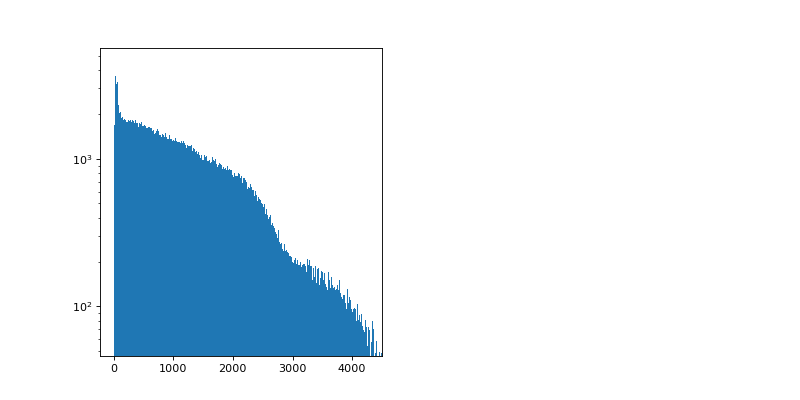

(array([9.0119e+04, 1.6860e+03, 4.5750e+03, 3.6410e+03, 3.2370e+03,
        3.5230e+03, 3.3020e+03, 2.9360e+03, 2.3110e+03, 2.0940e+03,
        2.0350e+03, 2.0710e+03, 1.9690e+03, 1.8970e+03, 1.9300e+03,
        1.9120e+03, 1.8430e+03, 1.8730e+03, 1.8670e+03, 1.8770e+03,
        1.8390e+03, 1.7850e+03, 1.8120e+03, 1.7740e+03, 1.8850e+03,
        1.8260e+03, 1.8000e+03, 1.7080e+03, 1.8440e+03, 1.7020e+03,
        1.7870e+03, 1.8340e+03, 1.7950e+03, 1.7990e+03, 1.7300e+03,
        1.7470e+03, 1.8250e+03, 1.8240e+03, 1.7570e+03, 1.7800e+03,
        1.7550e+03, 1.6550e+03, 1.7240e+03, 1.7560e+03, 1.7010e+03,
        1.7260e+03, 1.7650e+03, 1.7490e+03, 1.6650e+03, 1.7090e+03,
        1.6660e+03, 1.6850e+03, 1.6290e+03, 1.6770e+03, 1.6750e+03,
        1.6210e+03, 1.6110e+03, 1.6450e+03, 1.6350e+03, 1.5290e+03,
        1.6320e+03, 1.6130e+03, 1.5520e+03, 1.6210e+03, 1.5800e+03,
        1.5510e+03, 1.5620e+03, 1.4640e+03, 1.4750e+03, 1.5100e+03,
        1.5020e+03, 1.4110e+03, 1.5440e+03, 1.59

In [715]:
fig = plt.figure(figsize=[10,5])

#energy_array = energy_array[(energy_array>-100) & (energy_array<300)]


axis = fig.add_subplot(121)
#coeff,coeff_err,chisq_r=TPcal.gauss_fit(energy_array_h,150,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
axis.hist(energy_array_h,bins=1000,range=[0,10000],log=True)
#axis2 = fig.add_subplot(122)
#coeff,coeff_err,chisq_r=TPcal.gauss_fit(energy_array_f,150,True,axis2,'Gauss Fit','','',[0.65,0.5,"left"])
